## Machine Learning Assignment 3 : ROC Analysis

In [27]:
import math
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [141]:
class ROC():
    
    def __init__(self, probs, trueClass): 
        self.probs = probs
        self.trueClass = trueClass
    
    def compute_ROC_coordinates(self,probs,trueClass):
         
       # sorted_probs = probs.iloc[:,1]
        sp = probs.iloc[:,1]
        sorted_probs = sp.copy()
        sorted_probs.sort_values(ascending = False, inplace = True)
        trueClass = trueClass.reindex(index = sorted_probs.index)
    
        P = 0
        N = 0
        ##calculate P and N
        for i in range(0,len(trueClass)): 
            if(trueClass.iloc[i][0] == 'tested_positive'): 
                P +=1
            else: 
                N +=1
        fp = 0
        tp = 0
        
        ROC_coordinates = []
        previous_prob = -math.inf
        
        for i in range(0,len(trueClass)): 
            if(sorted_probs.iloc[i] != previous_prob):
                ROC_coordinates.append((fp/N, tp/P))
                previous_prob = sorted_probs.iloc[i]
                
            if(trueClass.iloc[i][0] == 'tested_positive'):
                tp = tp +1
            else: 
                fp = fp +1
            ROC_coordinates.append((fp/N, tp/P))
            output = pd.DataFrame(ROC_coordinates, columns = ['TruePositiveRate','FalsePositiveRate'])
            return output
                
    
   
    ##confusion matrix : contains tp,fp,tn,fn values
    ## tp = confusion_matrix[0][0]
    ## fp = confusion_matrix[0][1]
    ## fn = confusion_matrix[1][0]
    ## tn = confusion_matrix[1][1]
    
    
    ## fpr = fp/fp+tn
    ## tpr = tp/tp+fn
    
    def plot_roc_curve(self,roc_coordinates):
        plotted = roc_coordinates.plot.line('TruePositiveRate','FalsePositiveRate' , color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
    
    def compute_AUC(self,coordinates):
        aoc = np.trapz(coordinates['TruePositiveRate'], coordinates['FalsePositiveRate'])
        return aoc
    
    
  
        
           
    

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [143]:
data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.34, random_state = 10)
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


#### As seen in the plotted ROC curve below, there is an unexpected behaviour since true positive and false positive rates are both 0 and also area under curve is also  zero which means this fitting does not perform well. 

   TruePositiveRate  FalsePositiveRate
0               0.0           0.000000
1               0.0           0.010638


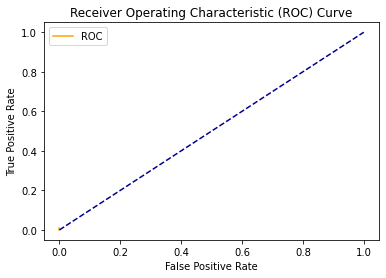

        0     1
568  0.26  0.74
620  0.77  0.23
456  0.58  0.42
197  0.97  0.03
714  0.67  0.33
..    ...   ...
581  0.94  0.06
300  0.24  0.76
110  0.45  0.55
450  0.99  0.01
21   0.67  0.33

[262 rows x 2 columns]


In [144]:


clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
y_pred = clf.predict_proba(X_test)

probs = pd.DataFrame(y_pred, index = X_test.index)
probs_col = probs.iloc[:,1]
trueClass = pd.DataFrame(Y_test)

test = ROC(probs,trueClass)
Roc_coordinates = test.compute_ROC_coordinates(probs,trueClass)
print(Roc_coordinates)

test.plot_roc_curve(Roc_coordinates)

test.compute_AUC(Roc_coordinates)
print(probs)